In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
df.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


In [4]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [5]:
df['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [6]:
# What is the distribution of age and gender among gym members?
age_fig = px.histogram(df, x='Age', title='Distributon of Age',nbins=20)
age_fig.show()
gender_counts = df['Gender'].value_counts()
gender_fig = px.pie(values=gender_counts.values, title='Distribution of Gender', names=gender_counts.index)
gender_fig.show()
age_gender_fig = px.histogram(df, x='Age', color='Gender', title='Age Distribution by Gender', nbins=20)
age_gender_fig.show()

In [7]:
# What is the average weight, height, and BMI for male and female members?
male_avg = df[df['Gender']=='Male'][['Weight (kg)','Height (m)','BMI']].mean()
female_avg = df[df['Gender']=='Female'][['Weight (kg)','Height (m)','BMI']].mean()
print("Average values for Male members:")
print(male_avg)
print("\nAverage values for female members:")
print(female_avg)

Average values for Male members:
Weight (kg)    85.531115
Height (m)      1.793405
BMI            26.886967
dtype: float64

Average values for female members:
Weight (kg)    60.939827
Height (m)      1.644242
BMI            22.727835
dtype: float64


In [8]:
avg_df = df.groupby('Gender')[['Weight (kg)','Height (m)','BMI']].mean().reset_index()
weight_fig = px.bar(avg_df, x='Gender', y='Weight (kg)', title='Average Weight by Gender')
weight_fig.show()
height_fig = px.bar(avg_df, x='Gender', y='Height (m)', title='Average Height by Gender')
height_fig.show()
bmi_fig = px.bar(avg_df, x='Gender', y='BMI', title='Average BMI by Gender')
bmi_fig.show()

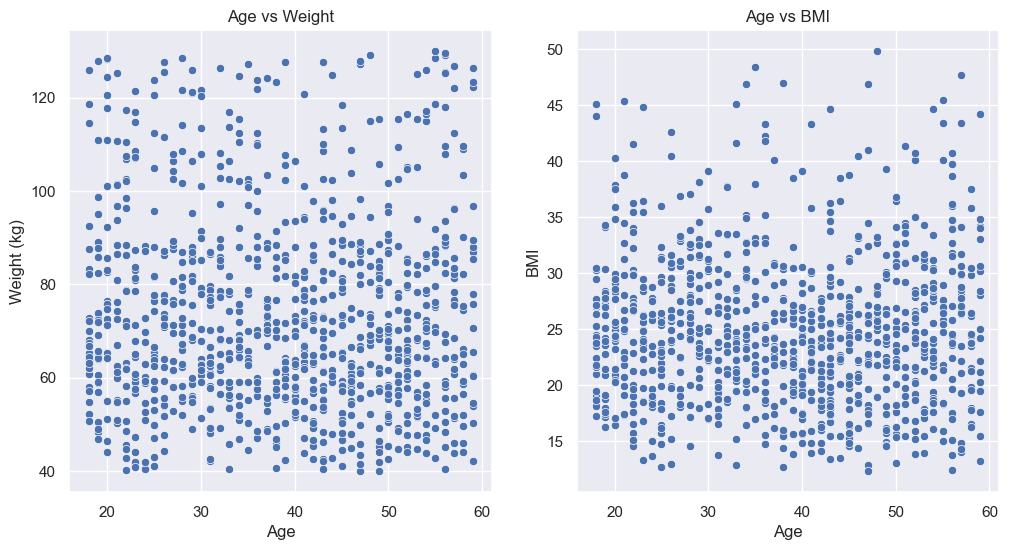

In [9]:
# How does age realte to weight and BMI?
from sklearn.linear_model import LinearRegression
sns.set()
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.scatterplot(x='Age', y='Weight (kg)', data=df)
plt.title('Age vs Weight')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='BMI', data=df)
plt.title('Age vs BMI')
plt.show()

In [10]:
from scipy.stats import pearsonr
age_weight_corr, _ = pearsonr(df['Age'],df['Weight (kg)'])
age_bmi_corr, _ = pearsonr(df['Age'], df['BMI'])
print(f"Correlation between age and weight:{age_weight_corr}")
print(f"Correlation between age and BMI:{age_bmi_corr}")

Correlation between age and weight:-0.03633963450725794
Correlation between age and BMI:-0.01369137028282223


In [11]:
X = df[['Age']] 
y_weight = df['Weight (kg)']
y_bmi = df['BMI']
weight_model = LinearRegression().fit(X, y_weight)
bmi_model = LinearRegression().fit(X, y_bmi)
print(f"Weight regression equation: weight = {weight_model.coef_[0]} * Age + {weight_model.intercept_}")
print(f"BMI regression equation: BMI ={bmi_model.coef_[0]} * Age + {bmi_model.intercept_}")

Weight regression equation: weight = -0.06326881049950989 * Age + 76.30213233133716
BMI regression equation: BMI =-0.007486832463279419 * Age + 25.201743974394013


In [12]:
# What is average max_BPM, avg_BPM, and Resting_BPM for members?
avg_max_BPM = df['Max_BPM'].mean()
avg_avg_BPM = df['Avg_BPM'].mean()
avg_resting_bpm = df['Resting_BPM'].mean()
print(f"Average max_BPM: {avg_max_BPM:.2f}")
print(f"Average avg_BPM: {avg_avg_BPM:.2f}")
print(f"Average Resting_BPM: {avg_resting_bpm}")

Average max_BPM: 179.88
Average avg_BPM: 143.77
Average Resting_BPM: 62.223021582733814


In [13]:
# How does workout_type impact max_BPM and avg_BPM?
workout_bpm_df = df.groupby('Workout_Type')[['Max_BPM', 'Avg_BPM']].mean().reset_index()
workout_bpm_df

,Workout_Type,Max_BPM,Avg_BPM
0,Cardio,179.874510,143.890196
1,HIIT,180.113122,143.524887
2,Strength,179.027132,144.313953
3,Yoga,180.606695,143.267782


In [14]:
max_bpm_fig = px.bar(workout_bpm_df, x='Workout_Type', y='Max_BPM', title='Workout Type vs max_BPM')
avg_bpm_fig = px.bar(workout_bpm_df, x='Workout_Type', y='Avg_BPM', title='Workout Type vs Avg_BPM')
max_bpm_fig.show()
avg_bpm_fig.show()

In [15]:
# Is there a correlation between Resting_BPM and Experience_Level
from scipy.stats import spearmanr
corr_coef, p_value = spearmanr(df['Resting_BPM'], df['Experience_Level'])
print(f"Spearmn rank correlation coefficient: {corr_coef:.2f}")
print(f"P-value: {p_value:.4f}")

Spearmn rank correlation coefficient: 0.00
P-value: 0.9916


In [16]:
resting_bpm_fig = px.box(df, x='Experience_Level', y='Resting_BPM', title='Experience Level vs Resting BPM')
resting_bpm_fig.show()

In [17]:
# What is the most popular workout_type among members?
most_popular_workout = df['Workout_Type'].value_counts().idxmax()
most_popular_workout_count = df['Workout_Type'].value_counts().max()
print(f"Most popular workout type: {most_popular_workout}")
print(f"Number of members: {most_popular_workout_count}")

Most popular workout type: Strength
Number of members: 258


In [18]:
# How does workout_frequecy vary by experience_level?
from scipy.stats import f_oneway
experience_freq_df = df.groupby('Experience_Level')['Workout_Frequency (days/week)'].mean().reset_index()
experience_freq_df

,Experience_Level,Workout_Frequency (days/week)
0,1,2.476064
1,2,3.534483
2,3,4.534031


In [19]:
freq_anova = f_oneway(*[df[df['Experience_Level'] == level]['Workout_Frequency (days/week)'] for level in df['Experience_Level'].unique()])
print(f"workout_frequency ANOVA: F-statististic={freq_anova.statistic}, p-value={freq_anova.pvalue}")

workout_frequency ANOVA: F-statististic=1136.7576832575767, p-value=5.515064820007735e-255


In [20]:
freq_fig = px.bar(experience_freq_df, x='Experience_Level', y='Workout_Frequency (days/week)', title='Expereince Level vs Workout Frequency')
freq_fig.show()

In [21]:
# Is there a relationship between season_duration and workout_frequency?
corr_coef, p_value = pearsonr(df['Session_Duration (hours)'], df['Workout_Frequency (days/week)'])
print(f"Correlation coefficient: {corr_coef:.2f}")
print(f"P-value: {p_value:.4f}")

Correlation coefficient: 0.64
P-value: 0.0000


In [22]:
freq_fig = px.scatter(df, x='Session_Duration (hours)', y='Workout_Frequency (days/week)', trendline='ols', title='Session_Duration vs Workout_Frequency ')
freq_fig.show()

In [23]:
# What is the average fat_percentage and water_intake among members?
avg_fat_percentage = df['Fat_Percentage'].mean()
avg_water_intake = df['Water_Intake (liters)'].mean()
print(f"Average fat percentage: {avg_fat_percentage:.2f}%")
print(f"Average water intake: {avg_water_intake:.2f} liters")

Average fat percentage: 24.98%
Average water intake: 2.63 liters


In [24]:
# How does BMI relate to Fat_percentage and calories_burned?
bmi_fat_corr_coef, bmi_fat_p_value = pearsonr(df['BMI'], df['Fat_Percentage'])
bmi_calories_corr_coef, bmi_calories_p_value = pearsonr(df['BMI'], df['Calories_Burned'])
fat_calories_corr_coef, fat_calories_p_values = pearsonr(df['Fat_Percentage'], df['Calories_Burned'])
print(f"BMI vs Fat Percentage: r={bmi_fat_corr_coef:.2f}, p-value ={bmi_fat_p_value:.4f}")
print(f"BMI vs Calories Burned: r={bmi_calories_corr_coef:.2f}, p-value={bmi_calories_p_value:.4f}")
print(f"Fat Percentage vs Calories Burned: r={fat_calories_corr_coef:.2f}, p-value={fat_calories_p_values:.4f}")

BMI vs Fat Percentage: r=-0.12, p-value =0.0002
BMI vs Calories Burned: r=0.06, p-value=0.0624
Fat Percentage vs Calories Burned: r=-0.60, p-value=0.0000


In [25]:
bmi_fat_fig = px.scatter(df, x='BMI', y='Fat_Percentage', trendline='ols', title='BMI vs Fat Percentage')
bmi_calories_fig = px.scatter(df, x='BMI', y='Calories_Burned', trendline='ols', title= 'BMI vs Calories Burned')
fat_calories_fig = px.scatter(df, x='Fat_Percentage', y='Calories_Burned', trendline='ols', title= 'Fat Percentage vs Calories Burned')
bmi_fat_fig.show()
bmi_calories_fig.show()
fat_calories_fig.show()

C:\Users\KPEKPE\AppData\Local\Temp\ipykernel_10604\2834080631.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Water_intake_category
Low         29.671196
Moderate    25.670058
High        20.405970
Name: Fat_Percentage, dtype: float64
Correlation coeficient: -0.59
P-value: 0.0000


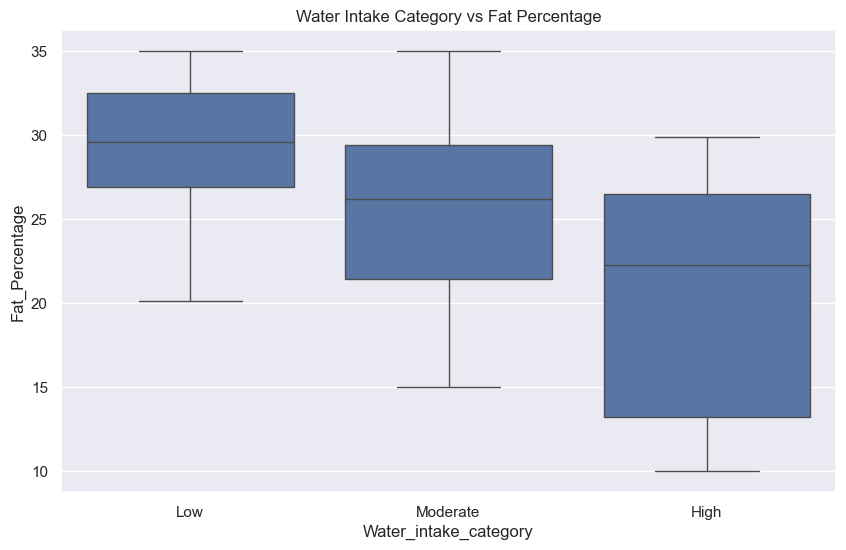

In [35]:
# Do members with higher water_intake tend to have lower Fat_pertcentage?
df['Water_intake_category'] = pd.cut(df['Water_Intake (liters)'], bins=[1, 2, 3, df['Water_Intake (liters)'].max()], labels=['Low', 'Moderate', 'High'])
mean_fat_percentage = df.groupby('Water_intake_category')['Fat_Percentage'].mean()
print(mean_fat_percentage)
corr_coef, p_value = pearsonr(df['Water_Intake (liters)'], df['Fat_Percentage'])
print(f"Correlation coeficient: {corr_coef:.2f}")
print(f"P-value: {p_value:.4f}")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Water_intake_category', y='Fat_Percentage', data=df)
plt.title('Water Intake Category vs Fat Percentage')
plt.show()

In [29]:
water_fat_fig = px.scatter(df, x='Water_Intake (liters)', y='Fat_Percentage', trendline='ols', title='Water Intake vs Fat Percentage')
water_fat_fig.show()

In [36]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Water_intake_category
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,High
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,Moderate
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,Moderate
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,Moderate
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,Moderate


In [39]:
# Is there a correlation between calories_burned and workout_frequency?
corr_coef, p_value = pearsonr(df['Calories_Burned'], df['Workout_Frequency (days/week)'])
print(f"Correlation coefficient: {corr_coef:.2f}")
print(f"P-value: {p_value:.4f}")

Correlation coefficient: 0.58
P-value: 0.0000


In [41]:
freq_calories_fig = px.scatter(df, x='Workout_Frequency (days/week)', y='Calories_Burned', trendline='ols', title='Working Frequency vs Calories Burned')
freq_calories_fig.show()

In [42]:
mean_calories_burned = df.groupby('Workout_Frequency (days/week)')['Calories_Burned'].mean()
mean_calories_burned

Workout_Frequency (days/week)
2     726.380711
3     821.437500
4     997.640523
5    1277.568627
Name: Calories_Burned, dtype: float64

In [44]:
# Does expereince_level predict max_BPM or avg_BPM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Experience_Level']]
y_max = df['Max_BPM']
y_avg = df['Avg_BPM']
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
X_train_avg, X_test_avg, y_avg_train, y_avg_test = train_test_split(X, y_avg, test_size=0.2, random_state=42)
model_max = LinearRegression()
model_avg = LinearRegression()
model_max.fit(X_train, y_max_train)
model_avg.fit(X_train_avg, y_avg_train)
y_max_pred = model_max.predict(X_test)
y_avg_pred = model_avg.predict(X_test_avg)

In [45]:
max_mse = mean_squared_error(y_max_test, y_max_pred)
max_r2 = r2_score(y_max_test, y_max_pred)
avg_mse = mean_squared_error(y_avg_test, y_avg_pred)
avg_r2 = r2_score(y_avg_test, y_avg_pred)

print(f"Max BPM Model: MSE={max_mse:.2f}, R2={max_r2:.2f}")
print(f"Avg BPM Model: MSE={avg_mse:.2f}, R2={avg_r2:.2f}")

Max BPM Model: MSE=130.30, R2=-0.00
Avg BPM Model: MSE=199.24, R2=-0.01


In [46]:
# Can BMI be predicted using age, weight, and height?
X = df[['Weight (kg)', 'Height (m)']]
y = df['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.65


In [49]:
# Can members be segemented based on workout_type and Experience_level
segments = df.groupby(['Workout_Type', 'Experience_Level']) 
print(segments.size())

Workout_Type  Experience_Level
Cardio        1                   109
              2                   102
              3                    44
HIIT          1                    85
              2                    87
              3                    49
Strength      1                    97
              2                   116
              3                    45
Yoga          1                    85
              2                   101
              3                    53
dtype: int64


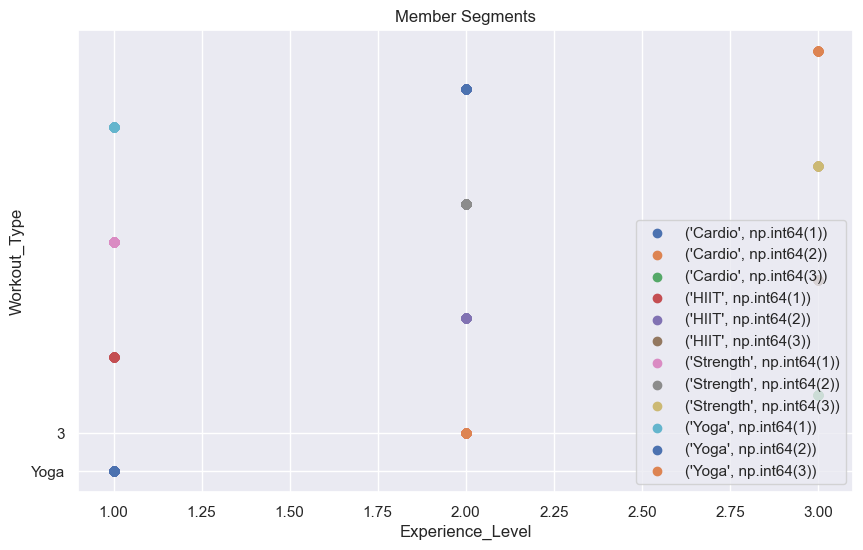

In [50]:
plt.figure(figsize=(10, 6))
for i, (Workout_Type, group) in enumerate(segments):
    plt.scatter(group['Experience_Level'], [i+1] *len(group), label=Workout_Type)
plt.xlabel('Experience_Level')
plt.ylabel('Workout_Type')
plt.yticks(range(1, len(Workout_Type)+1), Workout_Type)
plt.title('Member Segments')
plt.legend()
plt.show()

In [51]:
# Are there clusters of members with similar physical characteristics(e.g, weight, height,BMI)?
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
physical_chars = ['Weight (kg)', 'Height (m)', 'BMI']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[physical_chars])

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_

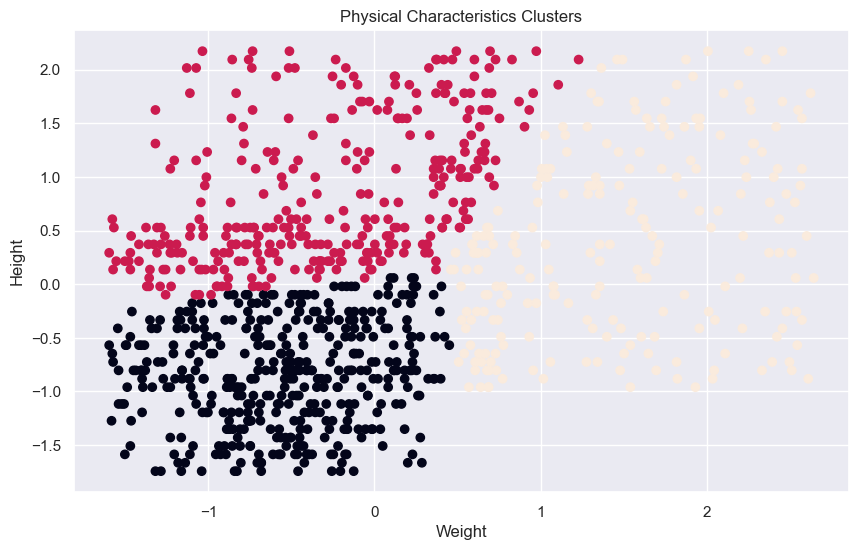

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Physical Characteristics Clusters')
plt.show()

In [57]:
# Can a model predict calories_burned based on workout_type, frequency, and intensity?
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Workout_Type']= le.fit_transform(df['Workout_Type'])
X = df[['Workout_Type', 'Workout_Frequency (days/week)', 'Weight (kg)','Height (m)', 'BMI', 'Age', 'Experience_Level']]
y = df['Calories_Burned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [58]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 42606.23


In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200,300], 'max_depth': [5, 10, 15]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'max_depth': 5, 'n_estimators': 200}
Best score: 0.5225605169563273


In [67]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=5, n_estimators=200)

In [68]:
y_pred = best_model.predict(X_test)

In [69]:
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(39274.43035670878)

In [77]:
# using another model for a best result
from sklearn.ensemble import GradientBoostingRegressor
df['Workout_Type'] = pd.Categorical(df['Workout_Type']).codes
X = df[['Workout_Type','Workout_Frequency (days/week)', 'Weight (kg)','Height (m)', 'BMI', 'Age', 'Experience_Level']]
y = df['Calories_Burned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [78]:
y_pred = model.predict(X_test)

In [79]:
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(39803.40685740114)

In [80]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100,200], 'learning_rate': [0.01, 0.1, 0.5]}
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best score: 0.5193060086811853


In [81]:
best_model = grid_search.best_estimator_
best_model

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [82]:
y_pred = model.predict(X_test)

In [83]:
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(39803.40685740114)

In [85]:
df['BMI'].values

array([30.2 , 32.  , 24.71, 18.41, 14.39, 20.55, 23.76, 30.57, 32.34,
       30.07, 43.31, 17.89, 43.4 , 23.62, 35.93, 13.88, 27.34, 13.98,
       21.81, 26.96, 28.41, 22.95, 25.16, 38.16, 22.51, 21.78, 20.12,
       17.6 , 24.54, 27.64, 33.4 , 28.31, 19.37, 25.83, 27.84, 42.63,
       24.37, 33.14, 19.11, 17.77, 21.4 , 17.3 , 33.8 , 23.93, 40.1 ,
       15.31, 18.07, 23.17, 20.42, 33.61, 19.43, 27.18, 34.18, 32.69,
       22.78, 44.84, 28.35, 21.77, 20.86, 16.99, 22.45, 16.86, 32.93,
       17.11, 22.28, 25.89, 33.55, 20.88, 19.72, 39.12, 27.7 , 25.89,
       15.24, 21.88, 35.86, 16.76, 18.15, 21.58, 33.16, 24.72, 17.27,
       19.65, 23.53, 28.87, 21.53, 19.42, 29.71, 22.89, 29.61, 29.53,
       31.44, 21.53, 27.85, 22.31, 30.3 , 22.15, 40.71, 37.56, 26.05,
       18.76, 29.61, 15.7 , 22.61, 34.5 , 18.12, 17.54, 18.66, 23.09,
       31.41, 29.87, 21.64, 25.68, 25.81, 23.52, 27.85, 23.74, 16.52,
       20.88, 30.52, 26.65, 24.16, 27.96, 34.06, 29.26, 30.54, 29.95,
       21.41, 17.88,

In [98]:
# Can a model identify members at risk of low physical activity (eg, based on workout_frequency and BMI)?
from sklearn.metrics import accuracy_score, classification_report
df['BMI_Category'] = pd.cut(df['BMI'], bins= [0, 18.5, 25, 30, np.inf], labels=['Underweight', 'Normal_Weight', 'Overweight', 'Obese'])
def assign_risk(row):
    if row['Workout_Frequency (days/week)'] == 2 and row['BMI_Category'] in ['Underweight', 'Obese']:
        return 'High Risk'
    elif row['Workout_Frequency (days/week)'] == 2 and row['BMI_Category'] == 'Normal_Weight':
        return 'Moderate Risk'
    elif row['Workout_Frequency (days/week)'] in [3, 4, 5] and row['BMI_Category'] == 'Underweight':
        return 'Moderate Risk'
    elif row['Workout_Frequency (days/week)'] in [3, 4, 5] and row['BMI_Category'] == 'Normal_Weight':
        return 'Low Risk'
    elif row['Workout_Frequency (days/week)'] in [3, 4, 5] and row['BMI_Category'] == 'Obese':
        return 'High Risk'
df['physical_activity_risk'] = df.apply(assign_risk, axis=1)
df.head()

C:\Users\KPEKPE\AppData\Local\Temp\ipykernel_10604\2950185966.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\KPEKPE\AppData\Local\Temp\ipykernel_10604\2950185966.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Water_intake_category,BMI_Category,physical_activity_risk,BMI_Category_encoded
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20,High,Obese,High Risk,1
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00,Moderate,Obese,High Risk,1
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71,Moderate,Normal_Weight,Low Risk,0
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41,Moderate,Underweight,Moderate Risk,2
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39,Moderate,Underweight,Moderate Risk,2


In [99]:
df = df.dropna(subset=['BMI_Category', 'physical_activity_risk'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BMI_Category_encoded'] = le.fit_transform(df['BMI_Category'])

In [100]:
from sklearn.ensemble import RandomForestClassifier
X = df[['Workout_Frequency (days/week)', 'BMI_Category_encoded']]
y = df['physical_activity_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
y_pred = model.predict(X_test)

In [102]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
               precision    recall  f1-score   support

    High Risk       1.00      1.00      1.00        41
     Low Risk       1.00      1.00      1.00        65
Moderate Risk       1.00      1.00      1.00        40

     accuracy                           1.00       146
    macro avg       1.00      1.00      1.00       146
 weighted avg       1.00      1.00      1.00       146

